In [1]:
import os
import tensorflow as tf
import csv
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mping

# New image map folder paths
image_map_folder = 'image_map/'
train_pairs_csv = image_map_folder + 'train_image_pairs.csv'
test_pairs_csv = image_map_folder + 'test_image_pairs.csv'

# Function to get image pairs and labels from CSV
def get_image_pairs_and_labels(pairs_csv_path):
    image_pairs = []
    labels = []
    with open(pairs_csv_path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        next(csv_reader)  # Skip header
        for row in csv_reader:
            image_path1 = row[0]
            image_path2 = row[1]
            label = int(row[2])
            image_pairs.append((image_path1, image_path2))
            labels.append(label)
    return image_pairs, labels

# Get training and testing image pairs and labels
train_image_pairs, train_labels = get_image_pairs_and_labels(train_pairs_csv)
test_image_pairs, test_labels = get_image_pairs_and_labels(test_pairs_csv)

# Print some samples to verify
print(f"Training image pairs: {train_image_pairs[:5]}")
print(f"Training labels: {train_labels[:5]}")
print(f"Testing image pairs: {test_image_pairs[:5]}")
print(f"Testing labels: {test_labels[:5]}")

print(f"Training pairs: {len(train_image_pairs)}")
print(f"Testing pairs: {len(test_image_pairs)}")

2024-07-22 18:41:14.318471: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-22 18:41:14.318515: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-22 18:41:14.319553: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-22 18:41:14.325026: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-22 18:41:14.942502: W tensorflow/compiler/tf2

Training image pairs: [('../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/250.png', '../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/130.png'), ('../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/228.png', '../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/219.png'), ('../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/278.png', '../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/229.png'), ('../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/201.png', '../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/172.png'), ('../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/64.png', '../../Calista/website-aesthetics-datasets-master/comparison-based-da

In [2]:
# random.seed(42)
# np.random.seed(42)
# tf.random.set_seed(42)

temp = list(zip(train_image_pairs, train_labels))
random.shuffle(temp)

train_image_pairs, train_labels = zip(*temp)

# print(f"train_labels: {train_labels}")

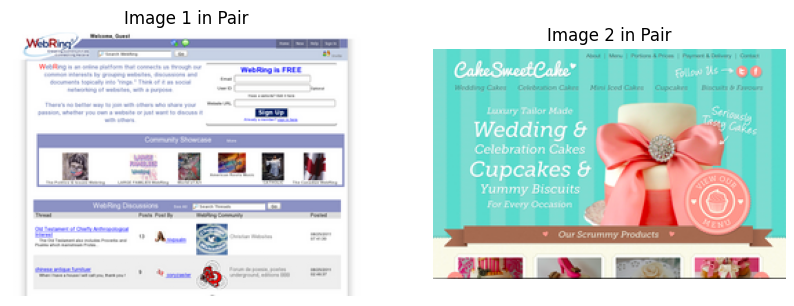

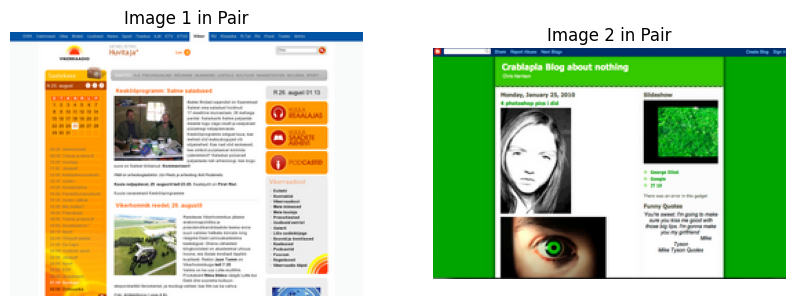

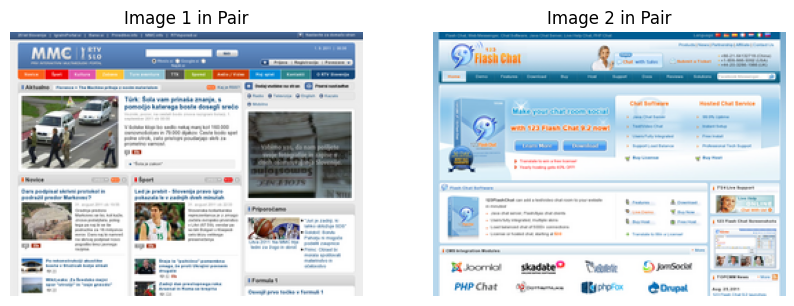

In [3]:
  # Display 3 random pairs of images side by side
for pair in train_image_pairs[:3]:
    img1 = mping.imread(pair[0])  # Read the first image in the pair
    img2 = mping.imread(pair[1])  # Read the second image in the pair

    # Create a figure with two subplots side by side
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Plot the first image on the first subplot
    axs[0].imshow(img1)
    axs[0].set_title('Image 1 in Pair')
    axs[0].axis('off')  # Hide axes

    # Plot the second image on the second subplot
    axs[1].imshow(img2)
    axs[1].set_title('Image 2 in Pair')
    axs[1].axis('off')  # Hide axes

    # Display the plot
    plt.show()

In [4]:
width = 256
height = 192
channels = 3
def read_and_process_image_pairs(list_of_image_pairs):
    X = []

    for image1, image2 in list_of_image_pairs:
        img1 = cv2.imread(image1, cv2.IMREAD_COLOR)
        img2 = cv2.imread(image2, cv2.IMREAD_COLOR)

        #  Resize images if needed
        img1 = cv2.resize(img1, (width, height), interpolation=cv2.INTER_AREA)
        img2 = cv2.resize(img2, (width, height), interpolation=cv2.INTER_AREA)
                # Print the dimensions of each image
        print(f"Image1 ({image1}) shape: {img1.shape}")
        print(f"Image2 ({image2}) shape: {img2.shape}")
        # img1 = cv2.resize(img1, (width, height), interpolation=cv2.INTER_CUBIC)
        # img2 = cv2.resize(img2, (width, height), interpolation=cv2.INTER_CUBIC)
        # img1 = cv2.resize(img1, (width, height), interpolation=cv2.INTER_LINEAR)
        # img2 = cv2.resize(img2, (width, height), interpolation=cv2.INTER_LINEAR)
        # img1 = cv2.resize(img1, (width, height), interpolation=cv2.INTER_LANCZOS4)
        # img2 = cv2.resize(img2, (width, height), interpolation=cv2.INTER_LANCZOS4)


        #         # Maintain aspect ratio by padding
        # img1 = maintain_aspect_ratio_and_resize(img1, width, height)
        # img2 = maintain_aspect_ratio_and_resize(img2, width, height)

        X.append((img1, img2))

    return X

 # Process training image pairs
X_pairs_train = np.array(read_and_process_image_pairs(train_image_pairs))
y_pairs_train = np.array(train_labels)

# Process validation image pairs
X_pairs_val = np.array(read_and_process_image_pairs(test_image_pairs))
y_pairs_val = np.array(test_labels)

# print(f"training pairs shape:   ",X_pairs_train.shape )

Image1 (../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/300.png) shape: (192, 256, 3)
Image2 (../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/216.png) shape: (192, 256, 3)
Image1 (../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/353.png) shape: (192, 256, 3)
Image2 (../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/222.png) shape: (192, 256, 3)
Image1 (../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/383.png) shape: (192, 256, 3)
Image2 (../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/1.png) shape: (192, 256, 3)
Image1 (../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/111.png) shape: (192, 256, 3)
Image2 (../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/65.png) shape: (

Image1 (../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/322.png) shape: (192, 256, 3)
Image2 (../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/205.png) shape: (192, 256, 3)
Image1 (../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/226.png) shape: (192, 256, 3)
Image2 (../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/45.png) shape: (192, 256, 3)
Image1 (../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/365.png) shape: (192, 256, 3)
Image2 (../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/189.png) shape: (192, 256, 3)
Image1 (../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/370.png) shape: (192, 256, 3)
Image2 (../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/125.png) shape:

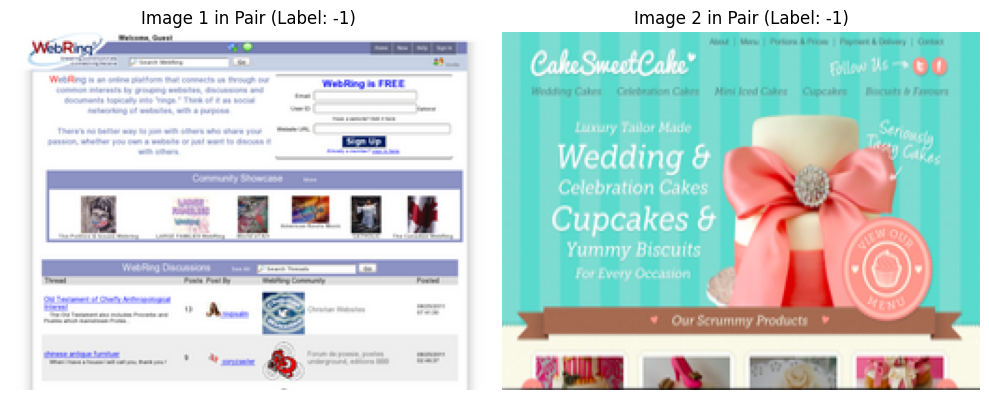

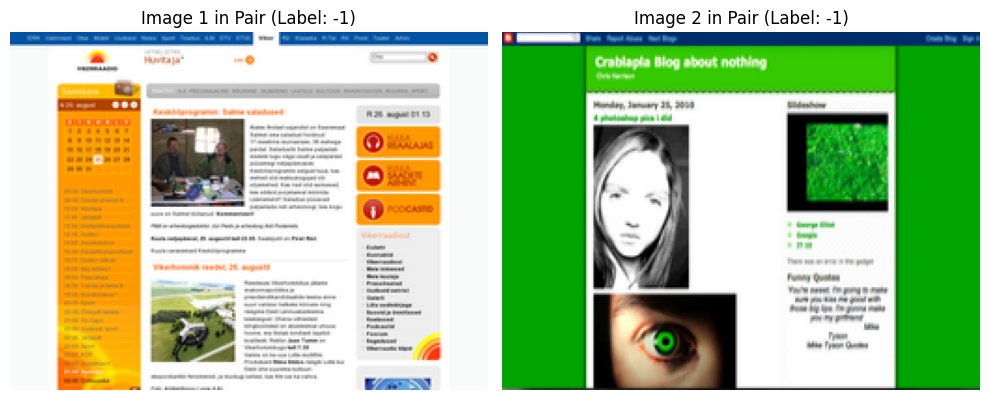

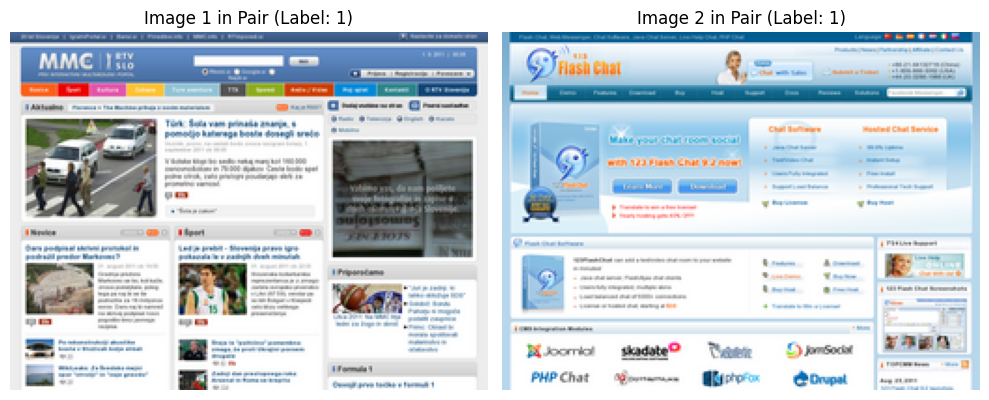

In [5]:

# Number of pairs to display
num_pairs_to_display = 3

# Loop through the pairs
for i in range(num_pairs_to_display):
    img1, img2 = X_pairs_train[i]
    label = y_pairs_train[i]

    # Create a figure with two subplots side by side
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Display the first image in the pair
    axs[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    axs[0].set_title(f'Image 1 in Pair (Label: {label})')
    axs[0].axis('off')

    # Display the second image in the pair
    axs[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    axs[1].set_title(f'Image 2 in Pair (Label: {label})')
    axs[1].axis('off')

    # Display the plot
    plt.tight_layout()
    plt.show()



In [6]:
ntrain = len(X_pairs_train)
nval = len(X_pairs_val)

In [7]:
import h5py

def traverse_datasets(hdf_file):

    def h5py_dataset_iterator(g, prefix=''):
        for key in g.keys():
            item = g[key]
            path = f'{prefix}/{key}'    
            if isinstance(item, h5py.Dataset): # test for dataset
                yield (path, item)
            elif isinstance(item, h5py.Group): # test for group (go down)
                yield from h5py_dataset_iterator(item, path)

    with h5py.File(hdf_file, 'r') as f:
        for path, _ in h5py_dataset_iterator(f):
            yield path

weights = {}
filename = '../../Calista/pretrainedModels/flickr_style.h5'

with h5py.File(filename, 'r') as f:
    for dset in traverse_datasets(filename):
        print('Path:', dset)
        # print('Shape:', f[dset].shape)
        # print('Data type:', f[dset].dtype)
        weights[dset] = f[dset][:]

conv1_bias = weights['/conv1/conv1/bias:0']
conv1_kernel = weights['/conv1/conv1/kernel:0']
conv2_bias = weights['/conv2/conv2/bias:0']
conv2_kernel = weights['/conv2/conv2/kernel:0']
conv3_bias = weights['/conv3/conv3/bias:0']
conv3_kernel = weights['/conv3/conv3/kernel:0']
conv4_bias = weights['/conv4/conv4/bias:0']
conv4_kernel = weights['/conv4/conv4/kernel:0']
conv5_bias = weights['/conv5/conv5/bias:0']
conv5_kernel = weights['/conv5/conv5/kernel:0']


Path: /conv1/conv1/bias:0
Path: /conv1/conv1/kernel:0
Path: /conv2/conv2/bias:0
Path: /conv2/conv2/kernel:0
Path: /conv3/conv3/bias:0
Path: /conv3/conv3/kernel:0
Path: /conv4/conv4/bias:0
Path: /conv4/conv4/kernel:0
Path: /conv5/conv5/bias:0
Path: /conv5/conv5/kernel:0
Path: /fc6/fc6/bias:0
Path: /fc6/fc6/kernel:0
Path: /fc7/fc7/bias:0
Path: /fc7/fc7/kernel:0
Path: /fc8_flickr/fc8_flickr/bias:0
Path: /fc8_flickr/fc8_flickr/kernel:0


In [8]:
from shared_feature_extractor import create_shared_feature_extractor
from comparison_model import create_comparisonModel
from keras import models, layers

# input_shape = (192, 256, 3)
shared_feature_extractor = create_shared_feature_extractor()

comparison_model = create_comparisonModel(shared_feature_extractor)

# comparison_input_a = layers.Input(shape=(192, 256, 3), name = 'comparison_input_a')
# comparison_input_b = layers.Input(shape=(192, 256, 3), name = 'comparison_input_b')
# comparison_output = comparison_model([comparison_input_a, comparison_input_b])

2024-07-22 18:41:24.732865: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-22 18:41:24.764960: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-22 18:41:24.765136: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [9]:
shared_feature_extractor.get_layer('conv1').set_weights([conv1_kernel[:, :, :, :], conv1_bias[:]])
shared_feature_extractor.get_layer('conv2_1').set_weights([conv2_kernel[:, :, :, :128], conv2_bias[:128]])
shared_feature_extractor.get_layer('conv2_2').set_weights([conv2_kernel[:, :, :, 128:], conv2_bias[128:]])
shared_feature_extractor.get_layer('conv3').set_weights([conv3_kernel[:, :, :, :], conv3_bias[:]])
shared_feature_extractor.get_layer('conv4_1').set_weights([conv4_kernel[:, :, :, :192], conv4_bias[:192]])
shared_feature_extractor.get_layer('conv4_2').set_weights([conv4_kernel[:, :, :, 192:], conv4_bias[192:]])
shared_feature_extractor.get_layer('conv5_1').set_weights([conv5_kernel[:, :, :, :128], conv5_bias[:128]])
shared_feature_extractor.get_layer('conv5_2').set_weights([conv5_kernel[:, :, :, 128:], conv5_bias[128:]])

# rating_model.summary()
# comparison_model.summary()
comparison_model.summary()

Model: "comparison_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_a (InputLayer)        [(None, 192, 256, 3)]        0         []                            
                                                                                                  
 input_b (InputLayer)        [(None, 192, 256, 3)]        0         []                            
                                                                                                  
 shared_feature_extractor (  (None, 5, 7, 256)            2334080   ['input_a[0][0]',             
 Functional)                                                         'input_b[0][0]']             
                                                                                                  
 flatten (Flatten)           (None, 8960)                 0         ['shared_featur

In [10]:
# Define the Bradley-Terry based loss for the comparison task
def bradley_terry_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    return tf.reduce_mean(tf.math.log(1 + tf.exp(-y_true * y_pred)))

# Custom accuracy function for the comparison output 
def custom_binary_accuracy(y_true, y_pred):
    # Use 0.0 as the threshold for tanh output
    y_pred = tf.where(y_pred >= 0.0, 1.0, -1.0)  # Convert predictions to 1 or -1
    # y_pred = tf.math.sign(y_pred)  # Convert predictions to -1 or 1
    y_true = tf.cast(y_true, tf.float32)
    return tf.reduce_mean(tf.cast(tf.equal(y_true, y_pred), tf.float32))

In [11]:
# from data_generator import comparison_data_generator
# batch_size = 64
# # Define the output signature
# comparison_output_signature = (
#     (
#         tf.TensorSpec(shape=(None, 192, 256, 3), dtype=tf.float32),
#         tf.TensorSpec(shape=(None, 192, 256, 3), dtype=tf.float32)
#     ),
#     tf.TensorSpec(shape=(None,), dtype=tf.float32)
# )

# # Create TensorFlow Dataset objects
# comparison_gen_train = tf.data.Dataset.from_generator(
#     lambda: comparison_data_generator(X_pairs_train, y_pairs_train, batch_size),
#     output_signature=comparison_output_signature
# )

# comparison_gen_val = tf.data.Dataset.from_generator(
#     lambda: comparison_data_generator(X_pairs_val, y_pairs_val, batch_size),
#     output_signature=comparison_output_signature
# )

In [12]:
batch_size = 64

class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, image_pairs, labels, batch_size, shuffle=True):
        self.image_pairs = image_pairs
        self.labels = labels
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.on_epoch_end()
        
    def __len__(self):
        return int(np.floor(len(self.image_pairs) / self.batch_size))
    
    def __getitem__(self, index):
        # Generate indices of the batch
        batch_indices = self.indices[index*self.batch_size:(index+1)*self.batch_size]
        
        # Generate data
        (image_a_batch, image_b_batch), label_batch = self.__data_generation(batch_indices)
        
        return (np.array(image_a_batch), np.array(image_b_batch)), np.array(label_batch)
    
    def on_epoch_end(self):
        self.indices = np.arange(len(self.image_pairs))
        if self.shuffle:
            np.random.shuffle(self.indices)
    
    def __data_generation(self, batch_indices):
        image_a_batch = []
        image_b_batch = []
        label_batch = []
        
        for i in batch_indices:
            image_a, image_b = self.image_pairs[i]

            # Normalize the images
            image_a = image_a.astype(np.float32) / 255.0
            image_b = image_b.astype(np.float32) / 255.0

            label = self.labels[i]

            image_a_batch.append(image_a)
            image_b_batch.append(image_b)
            label_batch.append(label)
        
        return (image_a_batch, image_b_batch), label_batch
    
train_generator = DataGenerator(X_pairs_train, y_pairs_train, batch_size)
val_generator = DataGenerator(X_pairs_val, y_pairs_val, batch_size)         

In [13]:
from keras.utils import get_custom_objects

epochs = 50 
# base_lr = 5e-5 GOOD!
base_lr = 1e-4
initial_learning_rate = base_lr
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

# adam_optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
adam_optimizer = tf.keras.optimizers.Adam(initial_learning_rate)

sgd = tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.9, nesterov=True)

# Register the custom loss functions and metrics
get_custom_objects().update({
    'bradley_terry_loss': bradley_terry_loss,
    'custom_binary_accuracy': custom_binary_accuracy
})


comparison_model.compile(loss='bradley_terry_loss', optimizer=adam_optimizer,
                    metrics=[custom_binary_accuracy])


In [14]:
# Fit the model
history = comparison_model.fit(train_generator,
    steps_per_epoch = ntrain // batch_size,
    validation_data = val_generator,
    validation_steps = nval // batch_size,
    epochs = epochs)



Epoch 1/50


2024-07-22 18:41:27.578963: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape incomparison_model/shared_feature_extractor/dropout1/dropout_1/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-07-22 18:41:27.931122: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-07-22 18:41:31.594829: I external/local_xla/xla/service/service.cc:168] XLA service 0x71e015b64930 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-07-22 18:41:31.594855: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 6GB, Compute Capability 6.1
2024-07-22 18:41:31.600045: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1721662891.672832 2385486 device_com

52/52 [==============================] - 20s 198ms/step - loss: 2.1364 - custom_binary_accuracy: 0.5303 - val_loss: 1.7618 - val_custom_binary_accuracy: 0.6187
Epoch 2/50
52/52 [==============================] - 10s 188ms/step - loss: 1.4954 - custom_binary_accuracy: 0.6620 - val_loss: 1.2895 - val_custom_binary_accuracy: 0.7094
Epoch 3/50
52/52 [==============================] - 10s 189ms/step - loss: 1.2060 - custom_binary_accuracy: 0.6806 - val_loss: 1.1078 - val_custom_binary_accuracy: 0.7063
Epoch 4/50
52/52 [==============================] - 10s 188ms/step - loss: 1.0584 - custom_binary_accuracy: 0.7013 - val_loss: 1.0113 - val_custom_binary_accuracy: 0.6625
Epoch 5/50
52/52 [==============================] - 10s 188ms/step - loss: 0.9668 - custom_binary_accuracy: 0.7037 - val_loss: 0.9341 - val_custom_binary_accuracy: 0.7156
Epoch 6/50
52/52 [==============================] - 10s 189ms/step - loss: 0.9108 - custom_binary_accuracy: 0.7124 - val_loss: 0.9084 - val_custom_binary_ac

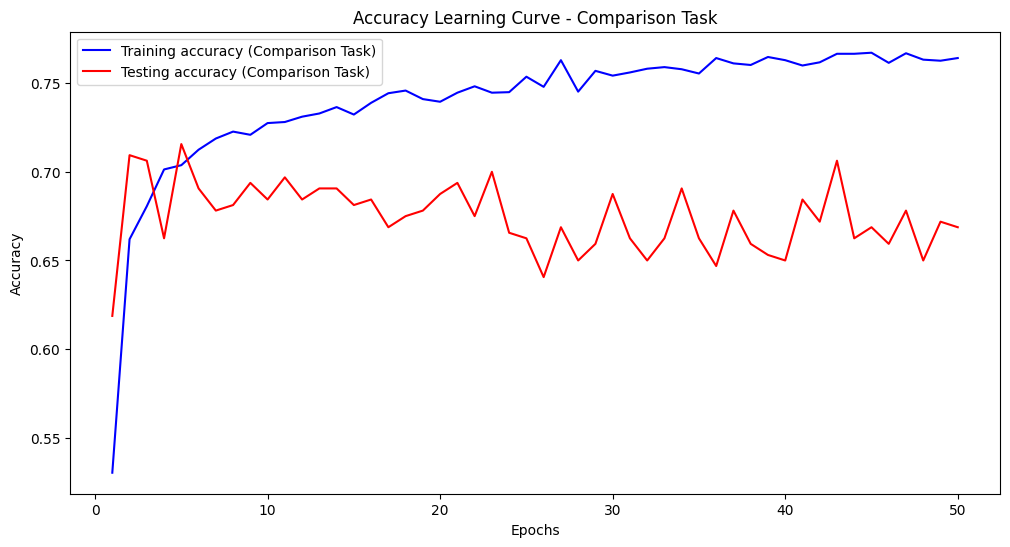

In [15]:
# Extract Accuracy metrics from history
comparison_output_custom_binary_accuracy = history.history['custom_binary_accuracy']
val_comparison_output_custom_binary_accuracy = history.history['val_custom_binary_accuracy']

epochs_x = range(1, len(comparison_output_custom_binary_accuracy) + 1)

# Plot the Accuracy learning curves for the comparison task
plt.figure(figsize=(12, 6))
plt.plot(epochs_x, comparison_output_custom_binary_accuracy, 'b', label='Training accuracy (Comparison Task)')
plt.plot(epochs_x, val_comparison_output_custom_binary_accuracy, 'r', label='Testing accuracy (Comparison Task)')
plt.title('Accuracy Learning Curve - Comparison Task')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

2/2 [==============================] - 2s 1s/step


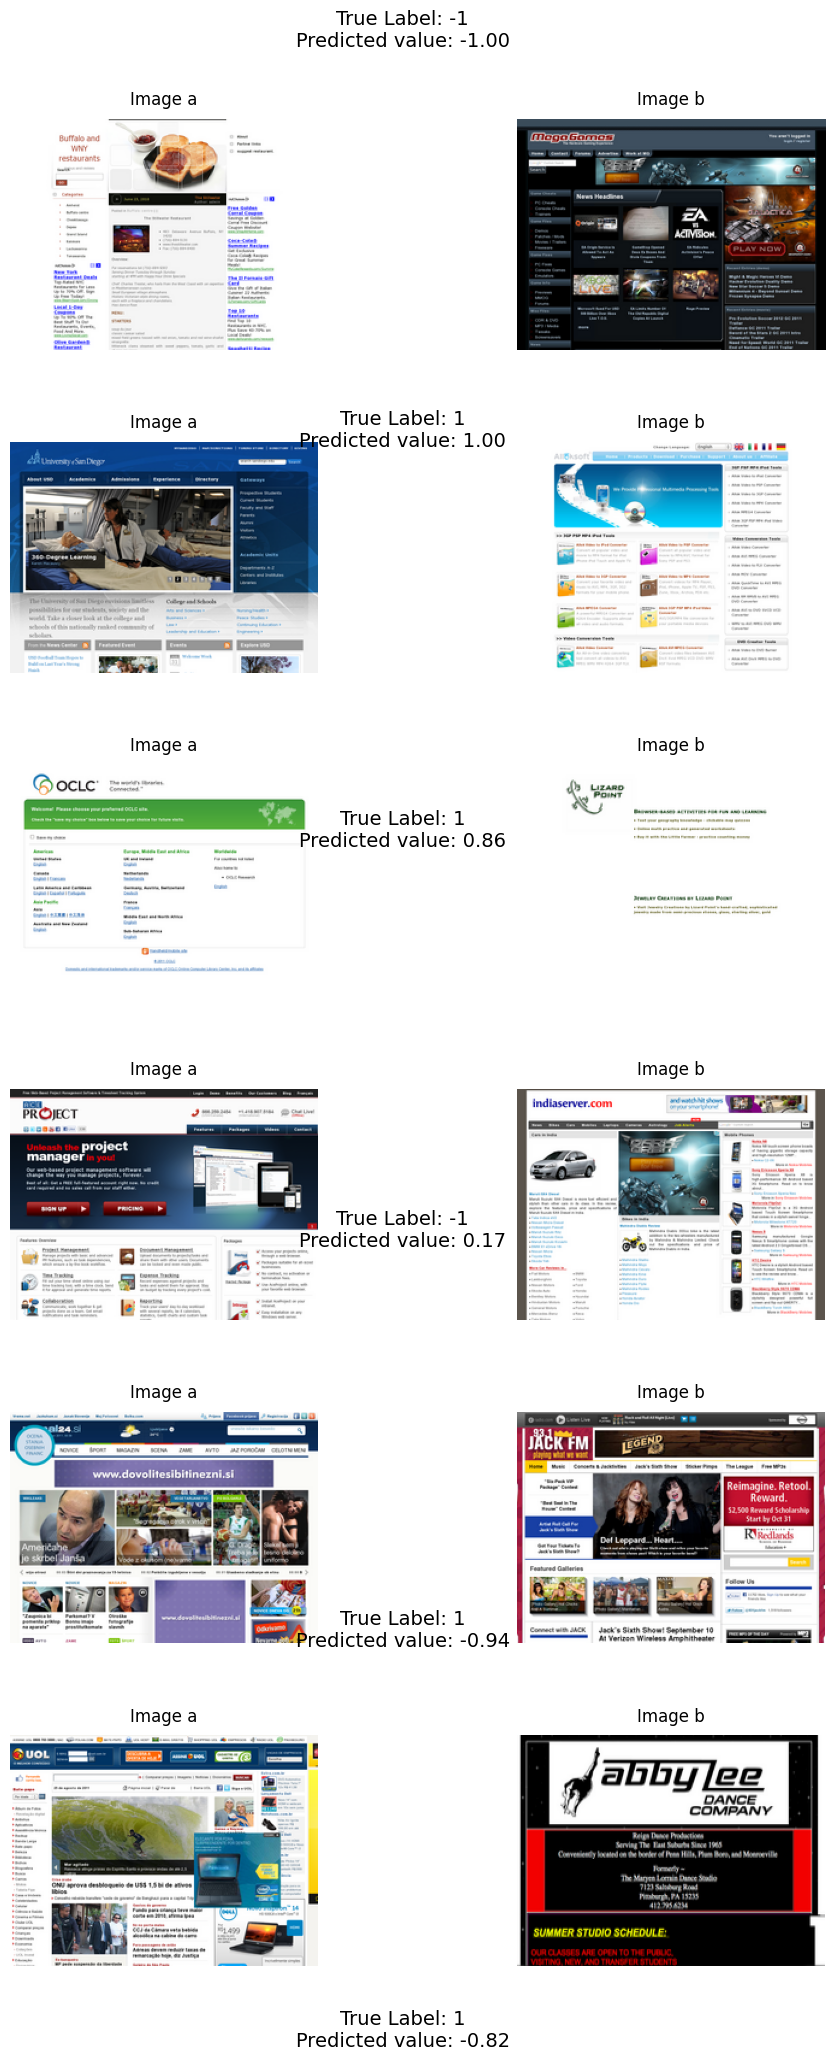

Custom Binary Accuracy: 0.6666666865348816


In [16]:
# # Comparison Model

# Normalize image pairs
def normalize_image_pairs(X_pairs):
    normalized_pairs = []
    for img1, img2 in X_pairs:
        img1_normalized = img1 / 255.0
        img2_normalized = img2 / 255.0
        normalized_pairs.append((img1_normalized, img2_normalized))
    return normalized_pairs

# Normalize the validation image pairs
X_pairs_val_normalized = normalize_image_pairs(X_pairs_val)

# Predict
comparison_predictions = []
num_batches = len(X_pairs_val_normalized) // batch_size


for i in range(num_batches):
    batch_pairs = X_pairs_val_normalized[i * batch_size:(i + 1) * batch_size]
    img1_batch = np.array([pair[0] for pair in batch_pairs])
    img2_batch = np.array([pair[1] for pair in batch_pairs])
    
    # Predict
    preds = comparison_model.predict([img1_batch, img2_batch])
    comparison_predictions.extend(preds.flatten())

# Handle remaining pairs if the number of pairs is not a multiple of batch_size
if len(X_pairs_val_normalized) % batch_size != 0:
    batch_pairs = X_pairs_val_normalized[num_batches * batch_size:]
    img1_batch = np.array([pair[0] for pair in batch_pairs])
    img2_batch = np.array([pair[1] for pair in batch_pairs])
    
    # Predict
    preds = comparison_model.predict([img1_batch, img2_batch])
    comparison_predictions.extend(preds.flatten())

comparison_predictions = np.array(comparison_predictions)


# for img1, img2 in X_pairs_val_normalized:
#     # Add batch dimension
#     img1_normalized = np.expand_dims(img1, axis=0)
#     img2_normalized = np.expand_dims(img2, axis=0)
    
#     # Predict
#     pred = comparison_model.predict([img1_normalized, img2_normalized])
#     comparison_predictions.append(float(pred[0][0]))

# comparison_predictions = np.array(comparison_predictions)

# # Pick random pairs
# num_pairs_to_display = 6  # Number of pairs to display
# pair_ids = random.sample(range(len(X_pairs_val)), num_pairs_to_display)

# Manually select specific IDs
manual_pair_ids = [24, 56, 62, 45, 16, 87]  # Replace with desired IDs

# Plotting
fig, axes = plt.subplots(len(manual_pair_ids), 2, figsize=(12, len(manual_pair_ids) * 4))
fig.subplots_adjust(hspace=0.4)
i = 0
for idx, id in enumerate(manual_pair_ids):
    img1, img2 = X_pairs_val[id]
    
    # Plot first image of the pair
    axes[idx, 0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    axes[idx, 0].axis('off')
    axes[idx, 0].set_title('Image a', fontsize=12, pad=10)
    
    # Plot second image of the pair
    axes[idx, 1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    axes[idx, 1].axis('off')
    axes[idx, 1].set_title('Image b', fontsize=12, pad=10)
    
    # Add text with the true label and predicted value in the middle between the images
    fig.text(0.5, (len(manual_pair_ids) - idx - 0.5) / len(manual_pair_ids), 
             f'True Label: {y_pairs_val[id]}\nPredicted value: {comparison_predictions[id]:.2f}', 
             ha='center', va='center', fontsize=14)

plt.show()


# Calculate custom binary accuracy
accuracy = custom_binary_accuracy(y_pairs_val, comparison_predictions)

print(f"Custom Binary Accuracy: {accuracy.numpy()}")



# # Create a new model to output intermediate layer results
# layer_name = 'Summed_Difference'  # or any other layer you want to inspect
# intermediate_layer_model = models.Model(inputs=comparison_model.input, outputs=comparison_model.get_layer(layer_name).output)

# # Get the intermediate output
# intermediate_output = intermediate_layer_model.predict([img1_normalized, img2_normalized])
# print(f"Intermediate output of {layer_name}: {intermediate_output}")

# # Check the output before the tanh activation
# dense_output_model = models.Model(inputs=comparison_model.input, outputs=comparison_model.get_layer('comparison_output').output)
# dense_output = dense_output_model.predict([img1_normalized, img2_normalized])
# print(f"Output before tanh activation: {dense_output}")

In [17]:
# def print_comparison_outputs(model, image_pairs):
#     # Get the shared dense layer
#     shared_dense_layer = model.get_layer('Comparisonfc9')

#     # Create intermediate models for the shared dense layer
#     model_input_a = model.input[0]
#     model_input_b = model.input[1]

#     intermediate_model_a = models.Model(inputs=model_input_a, outputs=shared_dense_layer(model.layers[2].output))
#     intermediate_model_b = models.Model(inputs=model_input_b, outputs=shared_dense_layer(model.layers[3].output))

#     # Create an intermediate model to get the difference calculated by the Subtract layer
#     difference_model = models.Model(inputs=model.input, outputs=model.get_layer('Difference').output)

#     for i, (img1, img2) in enumerate(image_pairs):
#         img1 = np.expand_dims(img1.astype(np.float32), axis=0)  # Add batch dimension
#         img2 = np.expand_dims(img2.astype(np.float32), axis=0)  # Add batch dimension
        
#         score1 = intermediate_model_a(img1).numpy().flatten()
#         score2 = intermediate_model_b(img2).numpy().flatten()

#         # Get the difference calculated by the Subtract layer
#         difference = difference_model([img1, img2]).numpy().flatten()
        
#         output = model([img1, img2]).numpy().flatten()
        
#         tf.print(f"Pair {i + 1} - img1 score: {score1}, img2 score: {score2}, Layer Difference: {difference}, Comparison Output: {output}")

# # Assuming X_pairs_val is a list of tuples (img1, img2)
# print_comparison_outputs(comparison_model, X_pairs_val_normalized)
from keras import layers, regularizers, models

def get_intermediate_outputs(model, inputs):
    # Create a function to fetch intermediate layer outputs
    intermediate_layer_model = models.Model(inputs=model.input, outputs=[model.get_layer("Comparisonfc8").output,
                                                                   model.get_layer("Difference").output])
    return intermediate_layer_model.predict(inputs)

def print_comparison_scores(model, pair):
    # Ensure the inputs are correctly shaped (batch_size, height, width, channels)
    input_a = np.expand_dims(pair[0], axis=0)
    input_b = np.expand_dims(pair[1], axis=0)

    # Check if the input needs to be converted to a specific format or normalized
    if len(input_a.shape) == 3:
        input_a = np.expand_dims(input_a, axis=-1)
    if len(input_b.shape) == 3:
        input_b = np.expand_dims(input_b, axis=-1)
    
    inputs = [input_a, input_b]
    
    comparison_output = model.predict(inputs)
    fc9_a, fc9_b, difference = get_intermediate_outputs(model, inputs)
    
    print(f"Score of Image A (fc9_a): {fc9_a}")
    print(f"Score of Image B (fc9_b): {fc9_b}")
    print(f"Difference (fc9_a - fc9_b): {difference}")
    print(f"Model Output: {comparison_output}")

def print_comparison_scores_batch(model, pairs):
    for i, pair in enumerate(pairs):
        print(f"Pair {i+1}:")
        print_comparison_scores(model, pair)
        print()

print_comparison_scores_batch(comparison_model, X_pairs_val_normalized)

Pair 1:
1/1 [==============================] - 0s 246ms/step


ValueError: not enough values to unpack (expected 3, got 2)

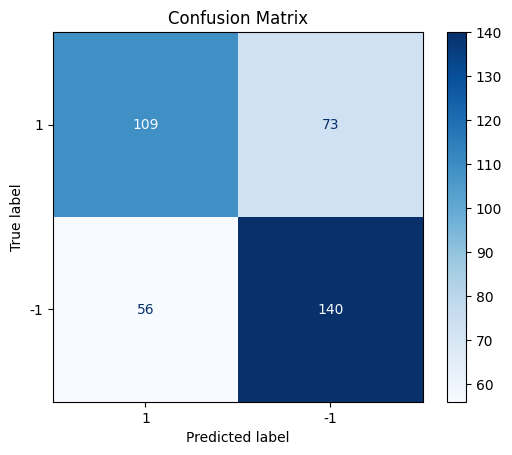

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

comparison_predictions
# Use 0.0 as the threshold for tanh output
comparison_predictions = tf.where(comparison_predictions >= 0.0, 1.0, -1.0)  # Convert predictions to 1 or -1


# Assuming y_true and y_pred are your true labels and predictions
cm = confusion_matrix(y_pairs_val, comparison_predictions, labels=[1, -1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, -1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()